# CNN chalenge

In this exercise, you will build a CNN to classify images from the Fashion MNIST dataset, train the model, evaluate its performance, and visualize predictions with a confusion matrix.

## Prepare the data

Load the Fashion MNIST dataset using Keras and display the first few images with their labels to get a sense of the data.

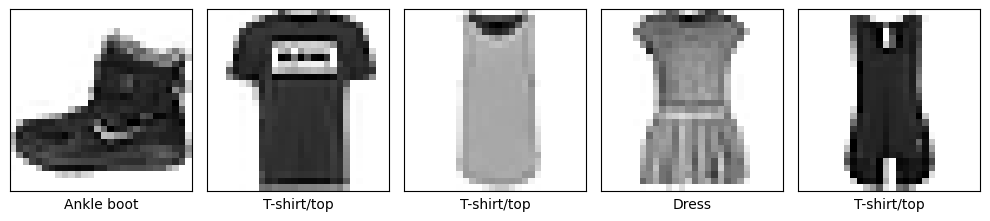

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Task: Normalize the data to have pixel values between 0 and 1
# Your code here

## Display the first few images with their labels

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])  
    plt.grid(False)  
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])


plt.tight_layout() 
plt.show()



Visualize 5 random images from the training set with their labels.

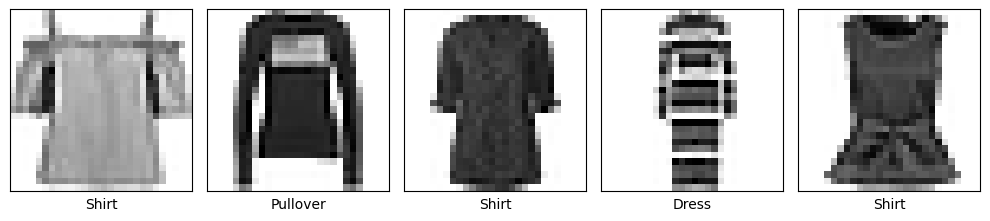

In [12]:
# Your code here for visualization

import numpy as np

random_indices = np.random.choice(len(x_train), size=5, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1) 
    plt.xticks([])  
    plt.yticks([]) 
    plt.grid(False)

    plt.imshow(x_train[idx], cmap=plt.cm.binary)

    plt.xlabel(class_names[y_train[idx]])

plt.tight_layout()
plt.show()



Reshape the data to include a channel dimension and confirm the new shape.

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


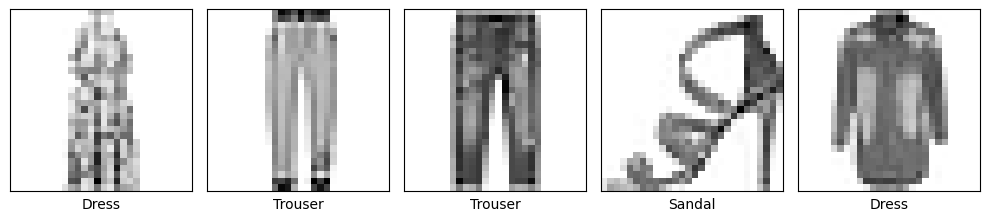

In [13]:
# Task: Reshape x_train and x_test to include the channel dimension
# Your code here

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

## Visualize the reshaped images

random_indices = np.random.choice(len(x_train), size=5, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)

    plt.xticks([])  
    plt.yticks([]) 
    plt.grid(False)

    plt.imshow(x_train[idx].squeeze(), cmap=plt.cm.binary)

    plt.xlabel(class_names[y_train[idx]])

plt.tight_layout()
plt.show()

## Build the CNN model

Create a CNN with at least two convolutional layers, followed by max pooling layers, and a dense output layer.

Rememeber the `Conv2D`, `MaxPooling2D`, `Flatten`, `Dropout` and `Dense`layers.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Task: Build your model here
model = Sequential([
    # Your layers here
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

Compile your model with an appropriate optimizer, loss function, and metric.

In [21]:
# Task: Compile your model
# Your code here

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train your model using model.fit(), setting a validation split of 20% and training for at least 10 epochs.

In [22]:
# Task: Train the model and store the training history in a variable
# Your code here

history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7547 - loss: 4.8544 - val_accuracy: 0.8582 - val_loss: 0.4042
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8894 - loss: 0.3194 - val_accuracy: 0.8878 - val_loss: 0.3299
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9062 - loss: 0.2549 - val_accuracy: 0.8874 - val_loss: 0.3223
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9193 - loss: 0.2254 - val_accuracy: 0.8902 - val_loss: 0.3309
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9233 - loss: 0.2099 - val_accuracy: 0.8872 - val_loss: 0.3247
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9275 - loss: 0.1961 - val_accuracy: 0.8823 - val_loss: 0.3559
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9332 - loss: 0.1825 - val_accuracy: 0.8876 - val_loss: 0.3894
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9375 - loss: 0

## Evaluate the model

Evaluate your model on the test set and print the test accuracy.

In [23]:
# Task: Evaluate the model on the test data
# Your code here

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - 3ms/step - accuracy: 0.8836 - loss: 0.4373
Test accuracy: 0.8835999965667725


Use your model to predict the labels for the test set. Display 5 test images with their predicted and true labels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


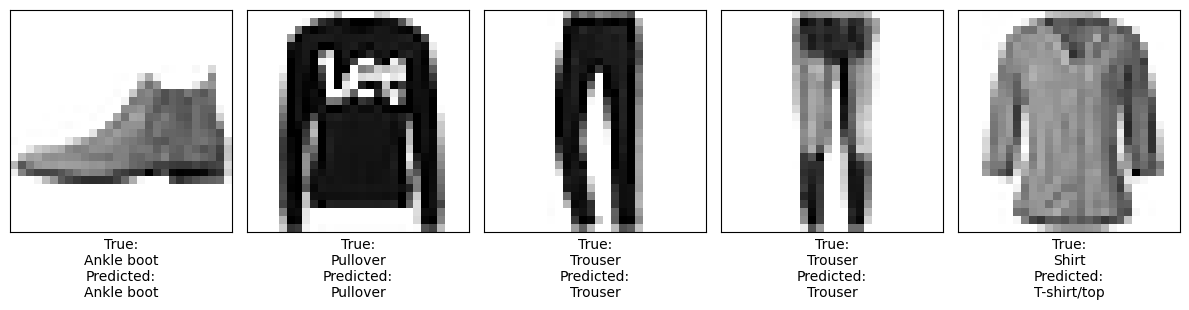

In [ ]:
# Task: Use model.predict() and display predictions
# Your code here to display images with predicted and actual labels

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)  
    plt.xticks([])  
    plt.yticks([])  
    plt.grid(False)  

   
    plt.imshow(x_test[i], cmap=plt.cm.binary)

    
    true_label = class_names[y_test[i]]
    predicted_label = class_names[predicted_labels[i]]
    plt.xlabel(f"True:\n{true_label}\nPredicted:\n{predicted_label}", fontsize=10)

plt.tight_layout()
plt.show()



Construct a confusion matrix to visualize how well your model performed across different classes.

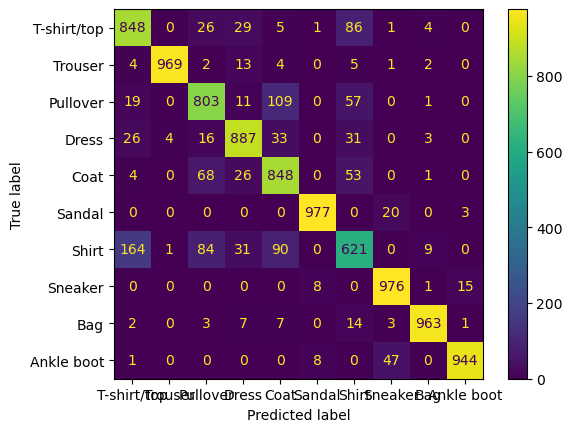

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Task: Create predictions and a confusion matrix
# Your code here

conf_matrix = confusion_matrix(y_test, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)


# Display the confusion matrix
# Your code here

disp.plot()
plt.show()

